<a href="https://colab.research.google.com/github/abdyraman/quantium/blob/main/quantium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for improved visualizations

In [59]:
behaviors_df=pd.read_csv('QVI_purchase_behaviour.csv')
transactions_df=pd.read_excel('QVI_transaction_data.xlsx')


In [60]:
behaviors_df.isnull().sum()
behaviors_df.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [61]:
duplicate_rows = behaviors_df[behaviors_df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))


Number of duplicate rows: 0


In [62]:
transactions_df.isnull().sum()
transactions_df.dtypes
transactions_df.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
58034,43430,55,55217,49798,6,RRD Lime & Pepper 165g,2,6.0
132040,43311,220,220402,219959,40,Thins Chips Seasonedchicken 175g,1,3.3
187803,43347,39,39170,35665,98,NCC Sour Cream & Garden Chives 175g,2,6.0
71287,43430,40,40320,37567,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2
177299,43312,105,105206,106541,94,Burger Rings 220g,2,4.6
52497,43542,230,230191,233229,81,Pringles Original Crisps 134g,2,7.4
73869,43496,101,101157,100934,5,Natural Chip Compny SeaSalt175g,2,6.0
10254,43646,112,112141,114611,98,NCC Sour Cream & Garden Chives 175g,2,6.0
43834,43473,125,125256,129319,63,Kettle 135g Swt Pot Sea Salt,2,8.4
15382,43518,231,231144,234288,78,Thins Chips Salt & Vinegar 175g,2,6.6


In [63]:
# Assuming transactions_df is your DataFrame
transactions_df['DATE'] = pd.to_datetime(transactions_df['DATE'], unit='D', origin='1900-01-01')



In [64]:
duplicate_rows_tra = transactions_df[transactions_df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 0


In [65]:
behaviors_df.sample(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
7161,26030,RETIREES,Budget
39183,147152,OLDER FAMILIES,Budget
49813,186198,YOUNG SINGLES/COUPLES,Mainstream
39836,149232,OLDER SINGLES/COUPLES,Mainstream
28872,106060,YOUNG SINGLES/COUPLES,Premium
35185,129174,OLDER FAMILIES,Budget
5464,20155,OLDER SINGLES/COUPLES,Mainstream
18398,67095,YOUNG FAMILIES,Mainstream
29540,108320,RETIREES,Premium
23488,84292,RETIREES,Budget


In [66]:
for col in behaviors_df.columns:
        print(col, behaviors_df[col].unique())

LYLTY_CARD_NBR [   1000    1002    1003 ... 2370751 2370961 2373711]
LIFESTAGE ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
PREMIUM_CUSTOMER ['Premium' 'Mainstream' 'Budget']


In [67]:
transactions_df.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
44460,2018-11-24,133,133095,136574,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0
168785,2018-10-14,230,230221,233454,83,WW D/Style Chip Sea Salt 200g,2,3.8
128724,2019-04-04,166,166050,167424,44,Thins Chips Light& Tangy 175g,1,3.3
250343,2019-04-30,157,157040,158660,22,Thins Chips Originl saltd 175g,2,6.6
150493,2018-08-20,63,63112,60087,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8
162781,2018-09-01,155,155025,155159,22,Thins Chips Originl saltd 175g,2,6.6
83317,2019-01-08,33,33224,30879,17,Kettle Sensations BBQ&Maple 150g,2,9.2
39759,2019-05-30,86,86250,85676,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4
47856,2019-03-01,178,178166,178571,54,CCs Original 175g,2,4.2
236872,2018-08-24,248,248013,250199,103,RRD Steak & Chimuchurri 150g,2,5.4


In [68]:
transactions_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [77]:
for col in transactions_df.columns:
        print(col, transactions_df[col].unique())

DATE ['2018-10-19T00:00:00.000000000' '2019-05-16T00:00:00.000000000'
 '2019-05-22T00:00:00.000000000' '2018-08-19T00:00:00.000000000'
 '2018-08-20T00:00:00.000000000' '2019-05-21T00:00:00.000000000'
 '2019-05-18T00:00:00.000000000' '2018-08-22T00:00:00.000000000'
 '2019-05-19T00:00:00.000000000' '2019-05-20T00:00:00.000000000'
 '2019-05-17T00:00:00.000000000' '2018-08-16T00:00:00.000000000'
 '2018-08-18T00:00:00.000000000' '2018-08-21T00:00:00.000000000'
 '2018-08-17T00:00:00.000000000' '2019-06-19T00:00:00.000000000'
 '2018-09-07T00:00:00.000000000' '2018-09-29T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-03-21T00:00:00.000000000'
 '2019-06-18T00:00:00.000000000' '2018-11-27T00:00:00.000000000'
 '2018-11-12T00:00:00.000000000' '2019-03-11T00:00:00.000000000'
 '2018-11-03T00:00:00.000000000' '2019-03-15T00:00:00.000000000'
 '2019-04-08T00:00:00.000000000' '2018-08-01T00:00:00.000000000'
 '2018-10-20T00:00:00.000000000' '2018-11-07T00:00:00.000000000'
 '2019-03-06T00:00:0

In [80]:
# Filter rows that contain 'Chips' or 'Chip'
transactions_df['PROD_NAME'] = transactions_df['PROD_NAME'].str.replace('[&\d\W_]', '', regex=True)
transactions_df = transactions_df[transactions_df['PROD_NAME'].str.contains('Chips|Chip', case=False)]

In [81]:
for col in transactions_df.columns:
        print(col, transactions_df[col].unique())

DATE ['2018-10-19T00:00:00.000000000' '2019-05-22T00:00:00.000000000'
 '2018-08-19T00:00:00.000000000' '2019-05-18T00:00:00.000000000'
 '2018-08-22T00:00:00.000000000' '2019-05-19T00:00:00.000000000'
 '2019-05-17T00:00:00.000000000' '2018-08-21T00:00:00.000000000'
 '2019-05-20T00:00:00.000000000' '2018-08-20T00:00:00.000000000'
 '2019-05-16T00:00:00.000000000' '2018-08-16T00:00:00.000000000'
 '2019-05-21T00:00:00.000000000' '2018-08-18T00:00:00.000000000'
 '2018-08-17T00:00:00.000000000' '2018-09-07T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-03-21T00:00:00.000000000'
 '2018-11-27T00:00:00.000000000' '2018-11-12T00:00:00.000000000'
 '2018-11-03T00:00:00.000000000' '2019-04-08T00:00:00.000000000'
 '2018-08-01T00:00:00.000000000' '2019-03-06T00:00:00.000000000'
 '2018-09-25T00:00:00.000000000' '2018-09-28T00:00:00.000000000'
 '2019-04-01T00:00:00.000000000' '2019-04-10T00:00:00.000000000'
 '2018-07-20T00:00:00.000000000' '2018-07-30T00:00:00.000000000'
 '2019-03-04T00:00:0

Visualisation

In [70]:
unique_counts_objects_behaviors = behaviors_df.select_dtypes('object').nunique()
unique_counts_objects_behaviors

LIFESTAGE           7
PREMIUM_CUSTOMER    3
dtype: int64

In [92]:
def visualisations_objects_columns(behaviors_df):
    sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "#9ed9cd"})
    sns.set_palette("pastel")

    # Loop through each categorical variable and create countplot and pie chart
    for col in behaviors_df.select_dtypes(include=['object']).columns:
        # Check if the number of unique values is not too high for better visualization
        if behaviors_df[col].nunique():
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))

            # Countplot
            ax1 = sns.countplot(data=behaviors_df, x=col, ax=axes[0])
            ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

            # Pie chart
            count_values = behaviors_df[col].value_counts()
            ax2 = axes[1]
            ax2.pie(count_values, labels=count_values.index, autopct='%1.1f%%', startangle=140)
            ax2.set_aspect("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

            plt.suptitle(col, backgroundcolor='black', color='white', fontsize=15)
            plt.show()

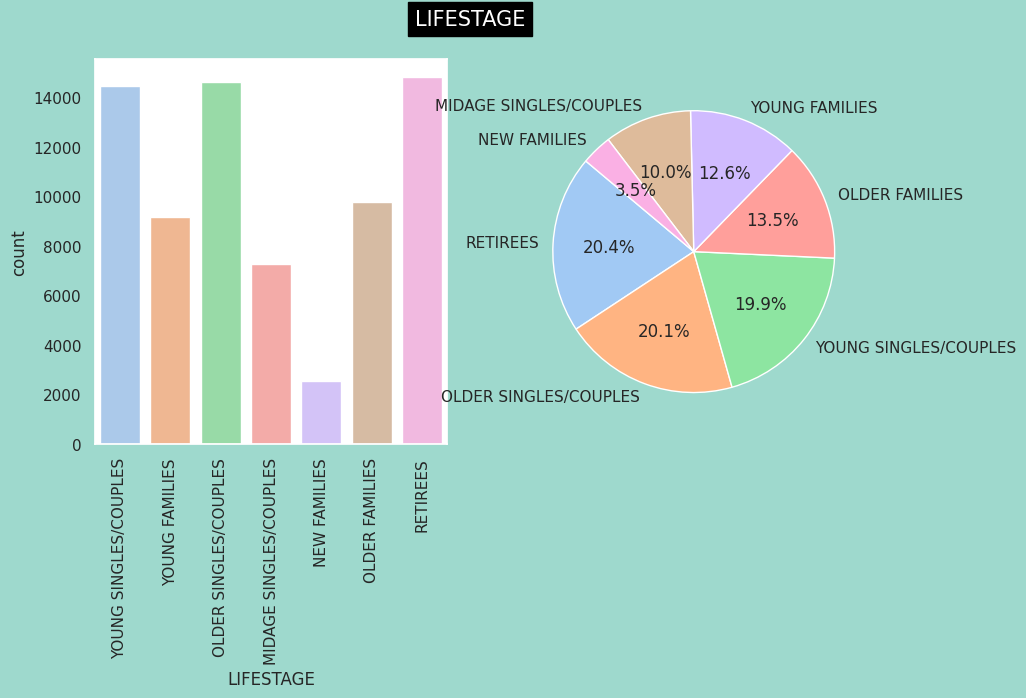

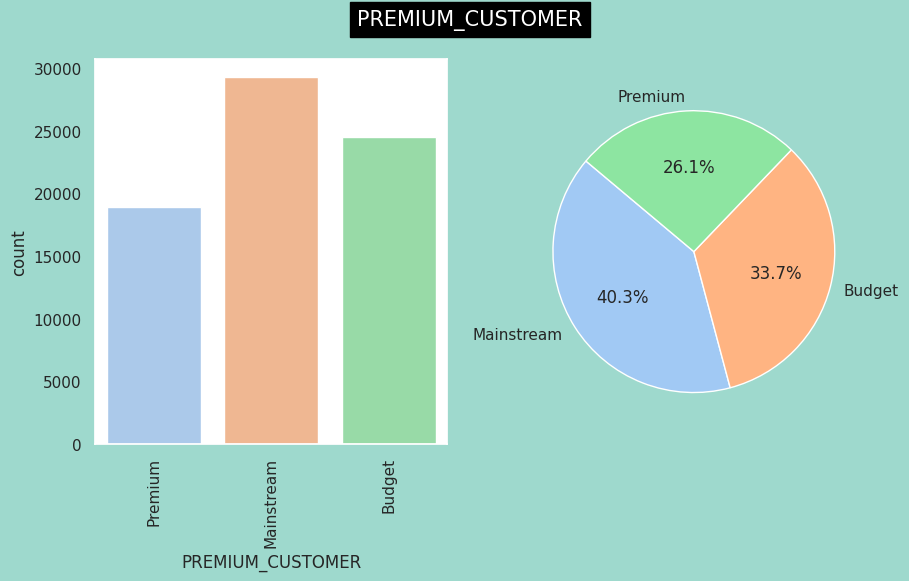

In [93]:
visualisations_objects_columns(behaviors_df)


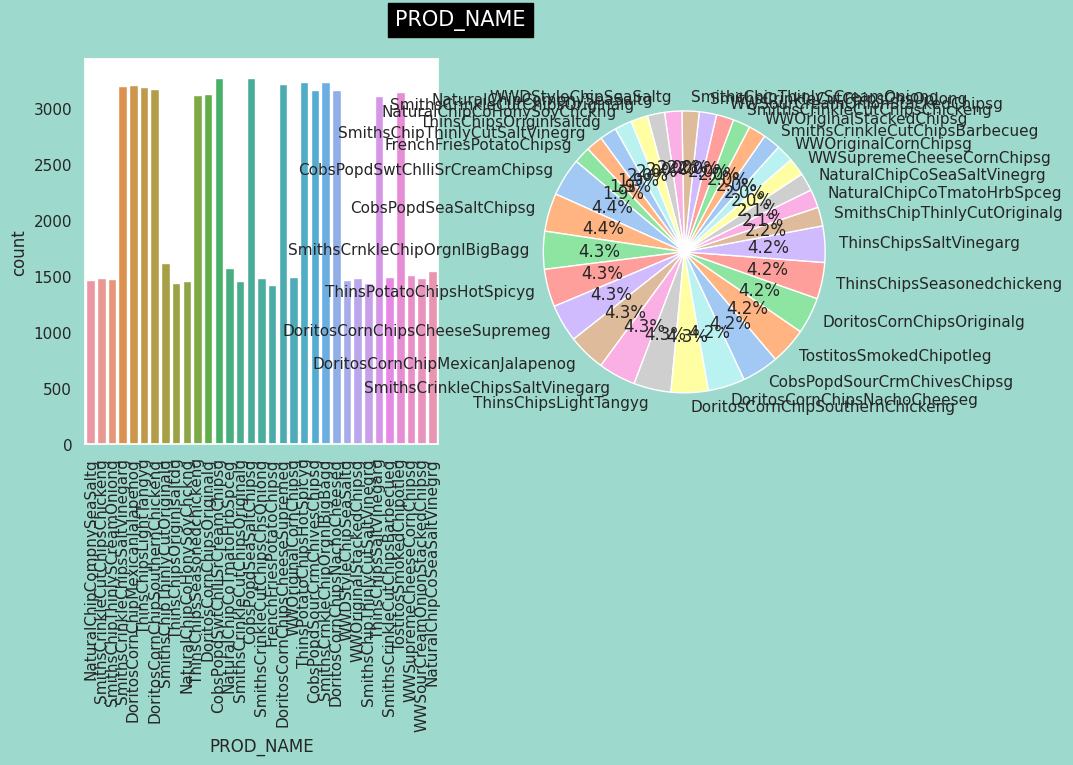

In [94]:
visualisations_objects_columns(transactions_df)


In [72]:
# Assuming transactions_df is your DataFrame
def plot_histogram_and_boxplot(transactions_df, column_name):
    plt.figure(figsize=(12, 6))

    # Plot the histogram
    plt.subplot(1, 2, 1)
    plt.hist(transactions_df[column_name], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    # Plot the box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=transactions_df[column_name], color='skyblue')
    plt.title(f'Box Plot of {column_name}')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()




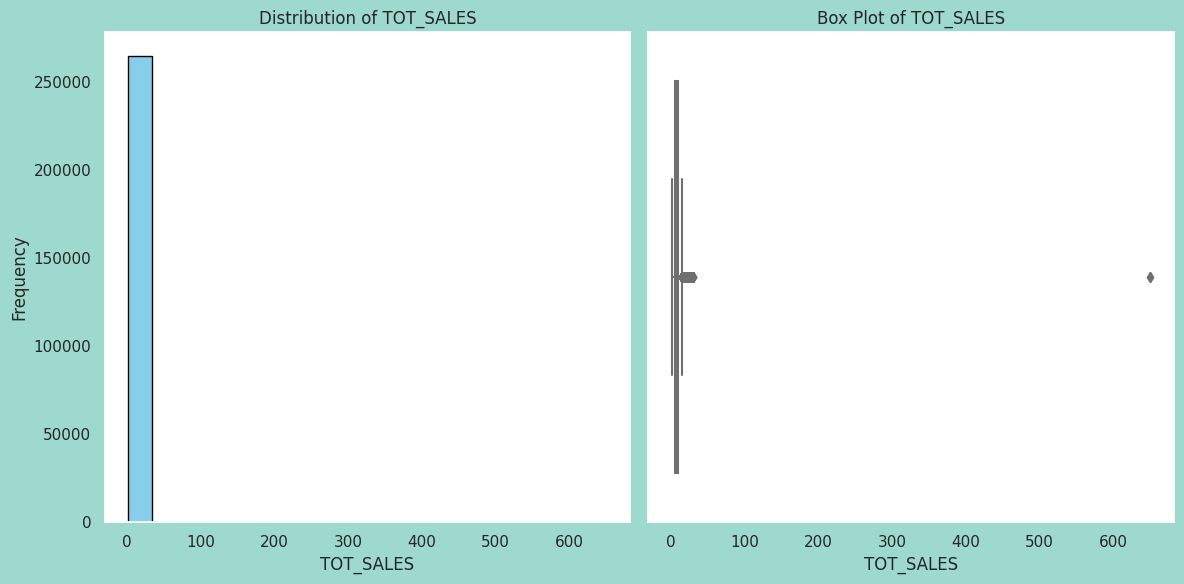

In [73]:
# Call the function with your DataFrame and column name
plot_histogram_and_boxplot(transactions_df, 'TOT_SALES')

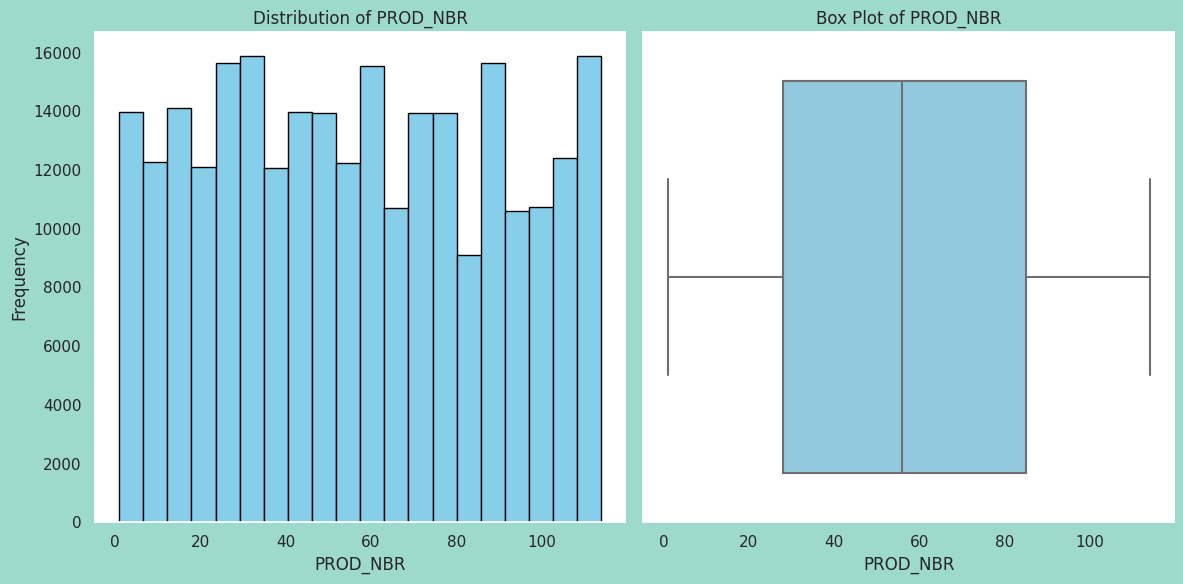

In [78]:
# Call the function with your DataFrame and column name
plot_histogram_and_boxplot(transactions_df, 'PROD_NBR')

In [74]:
# Assuming transactions_df is your DataFrame
outliersfree_transactions_df=transactions_df
outliersfree_transactions_df = transactions_df[transactions_df['PROD_QTY'] <= 25]
outliersfree_transactions_df = transactions_df[transactions_df['TOT_SALES'] <= 100]

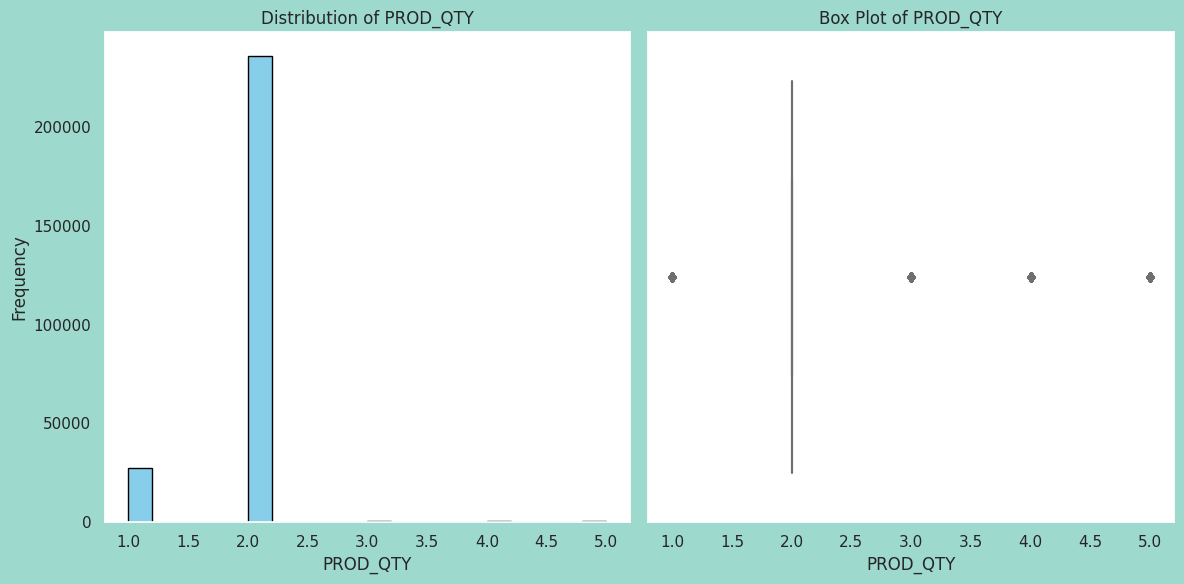

In [75]:
# Call the function with your DataFrame and column name
plot_histogram_and_boxplot(outliersfree_transactions_df, 'PROD_QTY')

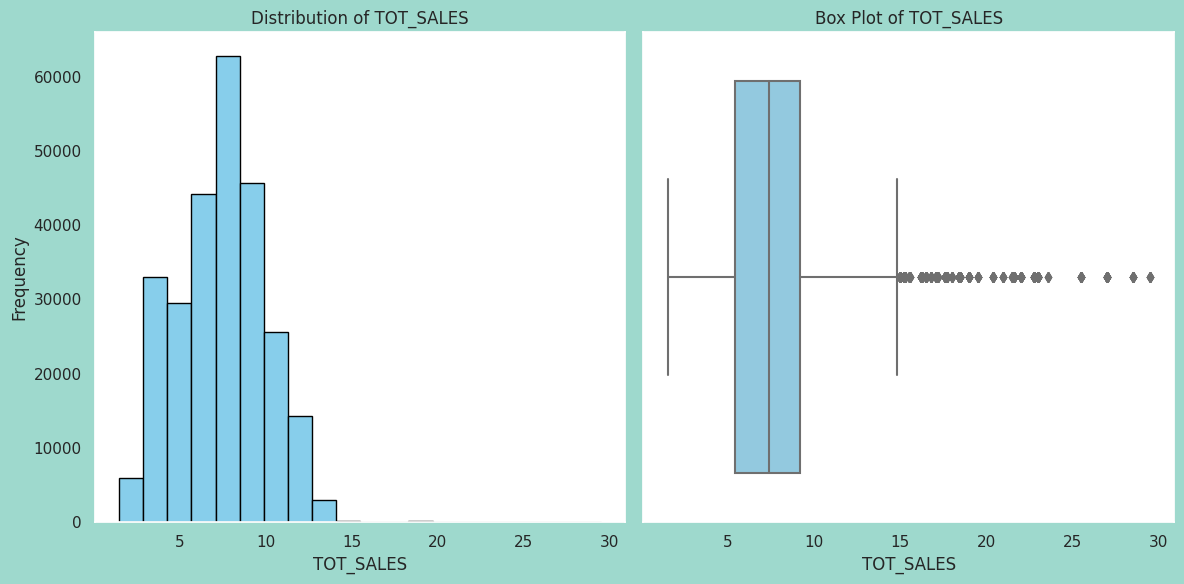

In [76]:
# Call the function with your DataFrame and column name
plot_histogram_and_boxplot(outliersfree_transactions_df, 'TOT_SALES')